# File scanner

In [61]:
import pandas as pd

import os
import datetime
import pprint
import pathlib
import hashlib
# import win32security  # pip install pywin32


In [62]:
directory = r'/Users/peter/Computrain/_InCompany/Defensie/Python Traject'

In [63]:
entries = []
for root, dirs, files in os.walk(directory, followlinks=False):

    dirs[:] = [d for d in dirs if not d.startswith('.') and not d.startswith('__')] 
    files[:] = [f for f in files if not f.startswith('.')] 

    # print('>>>>>>', root)
    # print(dirs)
    # print(files)
    # print(80 * '-')

    for file in files:
        filepath = os.path.join(root, file)

        size = os.path.getsize(filepath)

        stat = os.stat(filepath, follow_symlinks=False)

        atime = datetime.datetime.fromtimestamp(stat.st_atime)
        mtime = datetime.datetime.fromtimestamp(stat.st_mtime)
        ctime = datetime.datetime.fromtimestamp(stat.st_ctime)
        try:
            birthtime = datetime.datetime.fromtimestamp(stat.st_birthtime)
        except:
            birthtime = None

        _, file_extension = os.path.splitext(filepath)

        try:
            # works for mac-os or linux only!!!!
            path = pathlib.Path(filepath)
            owner = path.owner()

        except:
            try:
                # works for windows only!!!!
                pass
                # sd = win32security.GetFileSecurity(filepath, win32security.OWNER_SECURITY_INFORMATION
                # owner_sid = sd.GetSecurityDescriptorOwner()
                # owner, domain, type = win32security.LookupAccountSid(None, owner_sid)
                
            except:
                owner = stat.st_uid

        with open(filepath, mode = 'rb') as f:
            md5 = hashlib.file_digest(f, 'md5').hexdigest()
            
        d = {
            'dir': root,
            'file': file,
            'size': size,
            'atime': atime,
            'mtime': mtime,
            'ctime': ctime,
            'birthtime': birthtime,
            'file_extension': file_extension,
            'owner': owner,
            'md5': md5
        }
        entries.append(d)

pprint.pprint(entries)


[{'atime': datetime.datetime(2025, 11, 3, 14, 47, 18, 395458),
  'birthtime': datetime.datetime(2025, 11, 3, 14, 46, 15, 986682),
  'ctime': datetime.datetime(2025, 11, 3, 14, 48, 14, 34044),
  'dir': '/Users/peter/Computrain/_InCompany/Defensie/Python Traject',
  'file': 'example.db',
  'file_extension': '.db',
  'md5': '4a88d12ff97f730059829e5e5af72ae5',
  'mtime': datetime.datetime(2025, 11, 3, 14, 47, 18, 395253),
  'owner': 'peter',
  'size': 8192},
 {'atime': datetime.datetime(2025, 9, 29, 10, 40, 24, 783160),
  'birthtime': datetime.datetime(2025, 9, 29, 10, 40, 24, 725900),
  'ctime': datetime.datetime(2025, 9, 29, 10, 40, 24, 754641),
  'dir': '/Users/peter/Computrain/_InCompany/Defensie/Python Traject',
  'file': 'Python Traject.code-workspace',
  'file_extension': '.code-workspace',
  'md5': '25bf50b0ec79d01de8b83b7b5801b4ac',
  'mtime': datetime.datetime(2025, 9, 29, 10, 40, 24, 754641),
  'owner': 'peter',
  'size': 60},
 {'atime': datetime.datetime(2025, 11, 24, 14, 4, 47

In [64]:
df = pd.DataFrame(entries)
df

,dir,file,size,atime,mtime,ctime,birthtime,file_extension,owner,md5
0,/Users/peter/Computrain/_InCompany/Defensie/Py...,example.db,8192,2025-11-03 14:47:18.395458,2025-11-03 14:47:18.395253,2025-11-03 14:48:14.034044,2025-11-03 14:46:15.986682,.db,peter,4a88d12ff97f730059829e5e5af72ae5
1,/Users/peter/Computrain/_InCompany/Defensie/Py...,Python Traject.code-workspace,60,2025-09-29 10:40:24.783160,2025-09-29 10:40:24.754641,2025-09-29 10:40:24.754641,2025-09-29 10:40:24.725900,.code-workspace,peter,25bf50b0ec79d01de8b83b7b5801b4ac
2,/Users/peter/Computrain/_InCompany/Defensie/Py...,Exercise 5 - World Development Indicators.ipynb,411596,2025-11-24 14:04:47.877855,2025-11-14 14:58:35.520512,2025-11-24 14:04:14.860510,2025-10-27 03:12:32.000000,.ipynb,peter,f1a1e45f7adaec48c9eb482589da3a2d
3,/Users/peter/Computrain/_InCompany/Defensie/Py...,Exercise 7 - Pinguins dataset.ipynb,1018428,2025-11-24 14:04:47.909363,2025-11-20 13:38:52.024465,2025-11-24 14:04:14.860610,2025-10-27 03:12:32.000000,.ipynb,peter,ee1fe86033631a46b2892dc993d27ded
4,/Users/peter/Computrain/_InCompany/Defensie/Py...,Exercise 1 - Describe Numeric Data.ipynb,115258,2025-11-24 14:04:47.778723,2025-11-17 13:36:35.143788,2025-11-24 14:04:14.860702,2025-10-27 03:12:32.000000,.ipynb,peter,8066282eb8f822dbfe01cf48380fcfa5
...,...,...,...,...,...,...,...,...,...,...
120,/Users/peter/Computrain/_InCompany/Defensie/Py...,hangman.py,203,2025-09-30 15:57:40.563771,2025-09-30 15:57:38.682246,2025-09-30 15:57:38.682246,2025-09-30 15:47:45.297762,.py,peter,18e6d65178e3a1e0a0aec6d62b22e137
121,/Users/peter/Computrain/_InCompany/Defensie/Py...,basiswoorden-gekeurd.txt,2532852,2025-10-01 09:00:15.422198,2025-09-30 15:46:22.028807,2025-09-30 15:46:59.441973,2025-09-30 15:46:22.024539,.txt,peter,2e4ad7a0fdb892f7580474ad6a08370d
122,/Users/peter/Computrain/_InCompany/Defensie/Py...,timeit_in.py,761,2025-09-30 15:22:35.028180,2023-12-12 13:25:43.172586,2025-09-30 15:22:33.776663,2019-10-04 15:22:44.000000,.py,peter,73d2385627c7a89f803b9bfd5ecafe61
123,/Users/peter/Computrain/_InCompany/Defensie/Py...,guessing-game-player.py,666,2025-09-30 13:01:44.404823,2025-09-30 13:01:42.291319,2025-09-30 13:01:42.291319,2019-10-29 11:23:56.000000,.py,peter,fced5ec0404faae2c1133f2def620e51


In [70]:
df.set_index(['dir','file']).sort_index()[['size','md5']]

size  \
dir                                                file                                                          
/Users/peter/Computrain/_InCompany/Defensie/Pyt... Python Traject.code-workspace                            60   
                                                   example.db                                             8192   
/Users/peter/Computrain/_InCompany/Defensie/Pyt... Build a Sleek Sci-Fi Dashboard with Python and ...  3943178   
                                                   Plot Streaming Data with Plotly Express and Pyt...  1480507   
                                                   challenges.md                                          4371   
...                                                                                                        ...   
/Users/peter/Computrain/_InCompany/Defensie/Pyt... Exercise 3 - EDA mpg dataset.ipynb                  2270702   
                                                   Exercise 4 - KNMI daggegevens.ipynb                  535309   
                                                   Exercise 5 - World Development Indicators.ipynb      411596   
                                                   Exercise 6 - GeoPandas.ipynb                         665087   
                                                   Exercise 7 - Pinguins dataset.ipynb                 1018428   

                                                                                                                                    md5  
dir                                                file                                                                                  
/Users/peter/Computrain/_InCompany/Defensie/Pyt... Python Traject.code-workspace                       25bf50b0ec79d01de8b83b7b5801b4ac  
                                                   example.db                                          4a88d12ff97f730059829e5e5af72ae5  
/Users/peter/Computrain/_InCompany/Defensie/Pyt... Build a Sleek Sci-Fi Dashboard with Python and ...  a9e7973f96e0208f677fad4625140cba  
                                                   Plot Streaming Data with Plotly Express and Pyt...  0a0982ad8dd3e9403880d2671ae528ef  
                                                   challenges.md                                       a95cf7507c595c627bc574eb4b187eb3  
...                                                                                                                                 ...  
/Users/peter/Computrain/_InCompany/Defensie/Pyt... Exercise 3 - EDA mpg dataset.ipynb                  6c6964a289a472e8568585b0d64e4578  
                                                   Exercise 4 - KNMI daggegevens.ipynb                 61539beeb1bc6d358f34f78e805e0937  
                                                   Exercise 5 - World Development Indicators.ipynb     f1a1e45f7adaec48c9eb482589da3a2d  
                                                   Exercise 6 - GeoPandas.ipynb                        740ee0456c53cf474f26e106adae96c5  
                                                   Exercise 7 - Pinguins dataset.ipynb                 ee1fe86033631a46b2892dc993d27ded  

[125 rows x 2 columns]

In [65]:
file_extensions = df['file_extension'].value_counts()

for k, v in file_extensions.to_dict().items():
    print(f'{k:20} : {v:3}')

.py                  :  69
.ipynb               :  15
.csv                 :  10
.pdf                 :   8
.txt                 :   7
.html                :   4
.docx                :   3
.xlsx                :   3
.db                  :   1
.code-workspace      :   1
.md                  :   1
.pptx                :   1
                     :   1
.css                 :   1


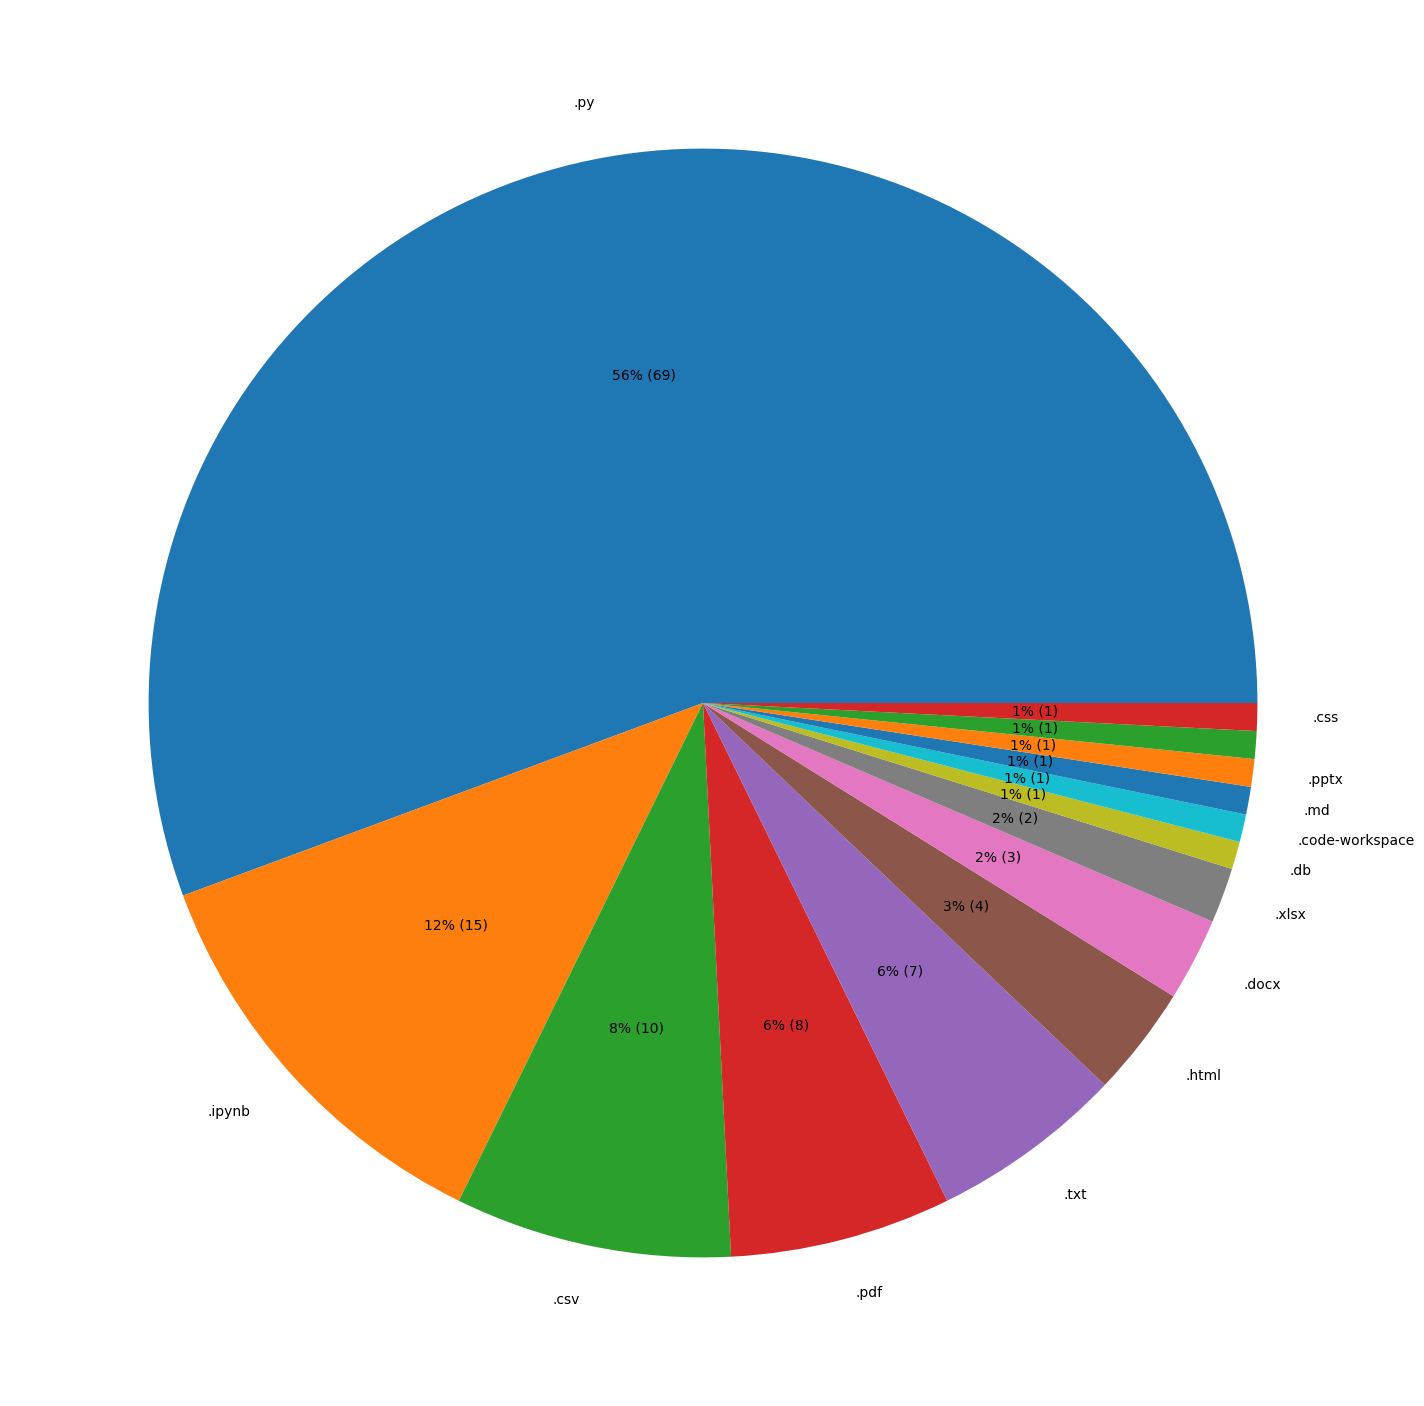

In [9]:
file_extensions.plot(kind = 'pie', 
                     autopct = lambda pct: f'{pct:.0f}% ({int(round(pct/100.*file_extensions.sum(), 0))})',
                     ylabel = '',
                     figsize = (18, 18));


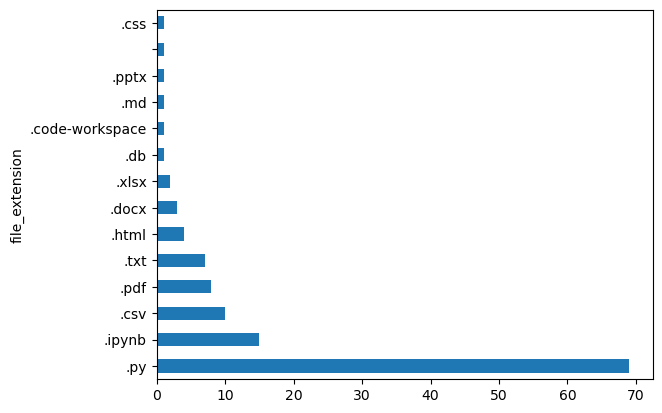

In [10]:
file_extensions.plot(kind='barh');

In [11]:
sizes = df.groupby('file_extension').agg({'size': 'sum'})
sizes['MB'] = (df.groupby('file_extension').agg({'size': 'sum'}) / (1024 * 1024)).round()
sizes

,size,MB
file_extension,,
,1128,0.0
.code-workspace,60,0.0
.css,171,0.0
.csv,2339094,2.0
.db,8192,0.0
.docx,211276,0.0
.html,627,0.0
.ipynb,7028638,7.0
.md,4371,0.0


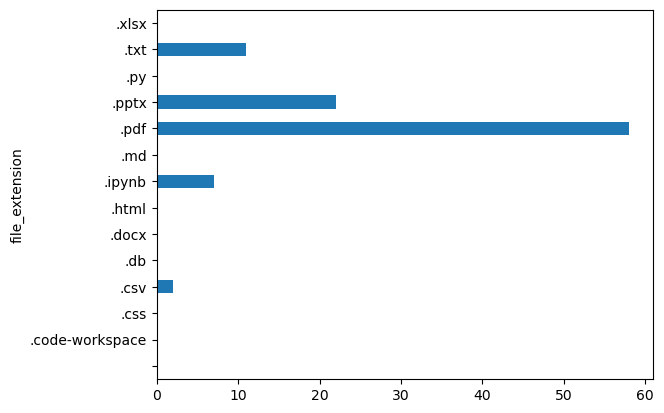

In [25]:
sizes['MB'].plot(kind='barh');

In [13]:
sizes

,size,MB
file_extension,,
,1128,0.0
.code-workspace,60,0.0
.css,171,0.0
.csv,2339094,2.0
.db,8192,0.0
.docx,211276,0.0
.html,627,0.0
.ipynb,7028638,7.0
.md,4371,0.0


### Duplicates

In [31]:
df[df.duplicated(subset='md5', keep=False)].sort_values(['md5'])[['dir','file']]

,dir,file
18,/Users/peter/Computrain/_InCompany/Defensie/Py...,ca-500.csv
95,/Users/peter/Computrain/_InCompany/Defensie/Py...,ca-500.csv
30,/Users/peter/Computrain/_InCompany/Defensie/Py...,exercise 2.11 - foolproof numeric input.py
68,/Users/peter/Computrain/_InCompany/Defensie/Py...,foolproof_input.py


### Export to excel

In [34]:
excel_filename = 'export.xlsx'

In [44]:
extentions = sorted(df['file_extension'].unique())
extentions

['',
 '.code-workspace',
 '.css',
 '.csv',
 '.db',
 '.docx',
 '.html',
 '.ipynb',
 '.md',
 '.pdf',
 '.pptx',
 '.py',
 '.txt',
 '.xlsx']

In [60]:
with pd.ExcelWriter(excel_filename) as writer:
    for extention in extentions:
        df_selected = df.query(f'file_extension=="{extention}"')
        df_selected.to_excel(writer, 
                             sheet_name = extention if extention else '-', 
                             index = False)